## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], lx=l2, lx_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=lx(lx_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=lx(lx_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Lx_EXP = [1e-2, 1e-8]
Lx = [l1, l2, l1_l2]

In [7]:
results = {}
for regulizer_ratio in Lx_EXP:
    for lx in Lx:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f, %s" % (regulizer_ratio, str(lx)))
        model = build_mlp(input_shape=x_train.shape[1:], lx=lx, lx_ratio=regulizer_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-%s" % (str(lx), str(regulizer_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000, <function l1 at 0x7f4d6db1f048>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________________________________________

50000/50000 [==============================] - 2s 40us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with Regulizer = 0.010000, <function l2 at 0x7f4d6db1f400>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________


50000/50000 [==============================] - 2s 38us/step - loss: 1.6139 - acc: 0.5247 - val_loss: 1.6849 - val_acc: 0.4923
Epoch 50/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6089 - acc: 0.5247 - val_loss: 1.6665 - val_acc: 0.5067
Experiment with Regulizer = 0.010000, <function l1_l2 at 0x7f4d6db1f488>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
out

50000/50000 [==============================] - 2s 40us/step - loss: 2.4614 - acc: 0.0993 - val_loss: 2.4613 - val_acc: 0.1000
Experiment with Regulizer = 0.000000, <function l1 at 0x7f4d6db1f048>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.0243 - acc: 0.2716 - val_loss: 1.8585 - val_acc: 0.3430
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7943 - acc: 0.3699 - val_loss: 1.7472 - val_acc: 0.3912
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7168 - acc: 0.3990 - val_loss: 1.6801 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6607 - acc: 0.4198 - val_loss: 1.6369 - val_acc: 0.4285
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6139 - acc: 0.4344 - val_loss: 1.5989 - val_acc: 0.4419
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5726 - acc: 0.4495 - val_loss: 1.5762 - val_acc: 0.4480
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5374 - acc: 0.4610 - val_loss: 1.5382 - val_acc

Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 13.0100 - acc: 0.3575 - val_loss: 12.1156 - val_acc: 0.3711
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 11.3351 - acc: 0.3820 - val_loss: 10.5820 - val_acc: 0.3911
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 9.9227 - acc: 0.3975 - val_loss: 9.2840 - val_acc: 0.4023
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 8.7228 - acc: 0.4092 - val_loss: 8.1799 - val_acc: 0.4146
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 7.7013 - acc: 0.4160 - val_loss: 7.2369 - val_acc: 0.4231
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 6.8304 - acc: 0.4204 - val_loss: 6.4386 - val_acc: 0.4261
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 6.0855 - acc: 0.4290 - val_loss: 5.7663 - val_acc: 0.4231
Epoch 9/50
50000/50000 [=============

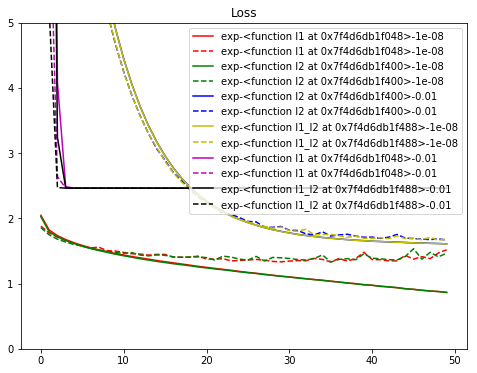

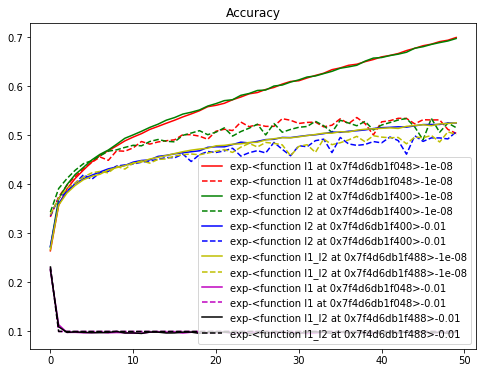

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()